In [2]:
import os
import pandas as pd
import plotly.graph_objects as go


Bad key "axes.titlelocation" on line 298 in
/Users/darylchang/Documents/covid-19/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Plot R_t on a map

In [22]:
# Read in Rt data
rt_df = pd.read_csv('https://d14wlfuexuxgcm.cloudfront.net/covid/rt.csv')

In [25]:
# Set min and max for the color bar
zmin, zmax = rt_df['ML'].min(), rt_df['ML'].max()

In [26]:
# Create Choropleth plot
for date in rt_df['date'].unique():
    date_df = rt_df[rt_df['date']==date]
        
    fig = go.Figure(data=go.Choropleth(
        locations=date_df['state'],
        z = date_df['ML'],
        locationmode='USA-states',
        colorscale='Reds',
        colorbar_title='R_t',
        marker_line_color='white',
        zauto=False,
        zmin=zmin,
        zmax=zmax,
    ))

    fig.update_layout(
        title_text = 'Effective reproductive number (R_t) of COVID-19 by state',
        annotations=[
            dict(
                x=0.5,
                y=-0.15,
                showarrow=False,
                text=date,
                font=dict(
                    family='Arial, sans-serif',
                    size=18,
                    color='black'
                ),
            ),
        ],
        geo = dict(
            scope='usa',
            projection=go.layout.geo.Projection(type='albers usa'),
            showlakes=True,
            lakecolor='rgb(255, 255, 255)'),
        )

    fig.write_image('plots/{}.jpg'.format(date))

In [27]:
# Create gif using ImageMagick
jpg_filenames_joined = ' '.join(['plots/' + f for f in sorted(os.listdir('plots'))])
!convert -delay 60 -loop 0 {jpg_filenames_joined} ./animated_map.gif

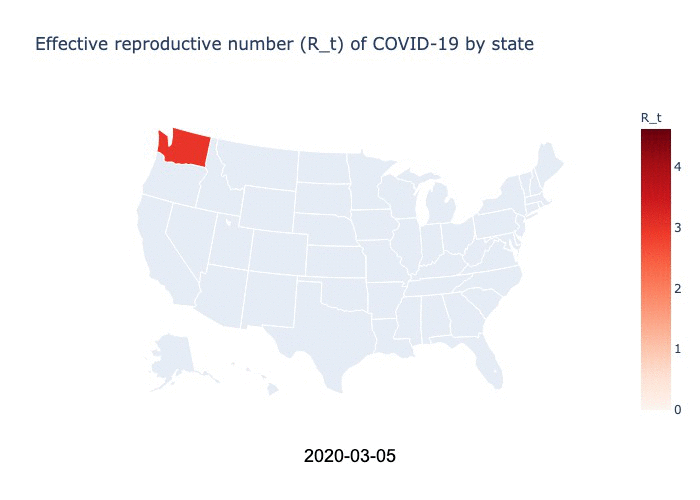

In [28]:
# Display gif (only shows first frame)
from PIL import Image
Image.open('animated_map.gif')